## Observations and Insights 

Each treatment regimen had roughly equal sample sizes, and there was a roughly equal sex distribution amongst the test subjects.

There is a strong correlation between mouse weight and tumor volume. Lighter mice tend to have smaller tumors.

Capomulin and Ramicane seem to be more effective than Infubinol and Ceftamin at shrinking tumor size

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_mice = len(merge_df["Mouse ID"].unique())
num_mice

249

In [3]:
# Create a column that combines "Mouse ID" and "Timepoint" fields
merge_df["mouse_time"] = merge_df["Mouse ID"] + "_" + merge_df["Timepoint"].astype(str)

# Check counts
merge_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
mouse_time            1893
dtype: int64

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merge_df = merge_df.drop_duplicates(subset=["mouse_time"], keep="first")

# Check counts to see if data was successfully dropped
merge_df.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
mouse_time            1888
dtype: int64

In [5]:
# Checking the number of mice in the clean DataFrame.
num_mice = len(merge_df["Mouse ID"].unique())
num_mice

249

## Summary Statistics

In [6]:
# Print all drug regiments
for drug in merge_df["Drug Regimen"].unique():
    print(drug)

Ramicane
Capomulin
Infubinol
Placebo
Ceftamin
Stelasyn
Zoniferol
Ketapril
Propriva
Naftisol


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

# Calculate summary stats for each regimen
ramicane = merge_df.loc[merge_df["Drug Regimen"] == "Ramicane"]
ramicane_mean = np.mean(ramicane["Tumor Volume (mm3)"])
ramicane_median = np.median(ramicane["Tumor Volume (mm3)"])
ramicane_variance = np.var(ramicane["Tumor Volume (mm3)"], ddof = 0)
ramicane_std = np.std(ramicane["Tumor Volume (mm3)"], ddof = 0)
ramicane_sem = ramicane["Tumor Volume (mm3)"].sem()

capomulin = merge_df.loc[merge_df["Drug Regimen"] == "Capomulin"]
capomulin_mean = np.mean(capomulin["Tumor Volume (mm3)"])
capomulin_median = np.median(capomulin["Tumor Volume (mm3)"])
capomulin_variance = np.var(capomulin["Tumor Volume (mm3)"], ddof = 0)
capomulin_std = np.std(capomulin["Tumor Volume (mm3)"], ddof = 0)
capomulin_sem = capomulin["Tumor Volume (mm3)"].sem()                  

infubinol = merge_df.loc[merge_df["Drug Regimen"] == "Infubinol"]
infubinol_mean = np.mean(infubinol["Tumor Volume (mm3)"])
infubinol_median = np.median(infubinol["Tumor Volume (mm3)"])
infubinol_variance = np.var(infubinol["Tumor Volume (mm3)"], ddof = 0)
infubinol_std = np.std(infubinol["Tumor Volume (mm3)"], ddof = 0)
infubinol_sem = infubinol["Tumor Volume (mm3)"].sem()   
                    
placebo = merge_df.loc[merge_df["Drug Regimen"] == "Placebo"]
placebo_mean = np.mean(placebo["Tumor Volume (mm3)"])
placebo_median = np.median(placebo["Tumor Volume (mm3)"])
placebo_variance = np.var(placebo["Tumor Volume (mm3)"], ddof = 0)
placebo_std = np.std(placebo["Tumor Volume (mm3)"], ddof = 0)
placebo_sem = placebo["Tumor Volume (mm3)"].sem() 

ceftamin = merge_df.loc[merge_df["Drug Regimen"] == "Ceftamin"]
ceftamin_mean = np.mean(ceftamin["Tumor Volume (mm3)"])
ceftamin_median = np.median(ceftamin["Tumor Volume (mm3)"])
ceftamin_variance = np.var(ceftamin["Tumor Volume (mm3)"], ddof = 0)
ceftamin_std = np.std(ceftamin["Tumor Volume (mm3)"], ddof = 0)
ceftamin_sem = ceftamin["Tumor Volume (mm3)"].sem() 

stelasyn = merge_df.loc[merge_df["Drug Regimen"] == "Stelasyn"]
stelasyn_mean = np.mean(stelasyn["Tumor Volume (mm3)"])
stelasyn_median = np.median(stelasyn["Tumor Volume (mm3)"])
stelasyn_variance = np.var(stelasyn["Tumor Volume (mm3)"], ddof = 0)
stelasyn_std = np.std(stelasyn["Tumor Volume (mm3)"], ddof = 0)
stelasyn_sem = stelasyn["Tumor Volume (mm3)"].sem()  

zoniferol = merge_df.loc[merge_df["Drug Regimen"] == "Zoniferol"]
zoniferol_mean = np.mean(zoniferol["Tumor Volume (mm3)"])
zoniferol_median = np.median(zoniferol["Tumor Volume (mm3)"])
zoniferol_variance = np.var(zoniferol["Tumor Volume (mm3)"], ddof = 0)
zoniferol_std = np.std(zoniferol["Tumor Volume (mm3)"], ddof = 0)
zoniferol_sem = zoniferol["Tumor Volume (mm3)"].sem() 

ketapril = merge_df.loc[merge_df["Drug Regimen"] == "Ketapril"]
ketapril_mean = np.mean(ketapril["Tumor Volume (mm3)"])
ketapril_median = np.median(ketapril["Tumor Volume (mm3)"])
ketapril_variance = np.var(ketapril["Tumor Volume (mm3)"], ddof = 0)
ketapril_std = np.std(ketapril["Tumor Volume (mm3)"], ddof = 0)
ketapril_sem = ketapril["Tumor Volume (mm3)"].sem()

propriva = merge_df.loc[merge_df["Drug Regimen"] == "Propriva"]
propriva_mean = np.mean(propriva["Tumor Volume (mm3)"])
propriva_median = np.median(propriva["Tumor Volume (mm3)"])
propriva_variance = np.var(propriva["Tumor Volume (mm3)"], ddof = 0)
propriva_std = np.std(propriva["Tumor Volume (mm3)"], ddof = 0)
propriva_sem = propriva["Tumor Volume (mm3)"].sem()

naftisol = merge_df.loc[merge_df["Drug Regimen"] == "Naftisol"]
naftisol_mean = np.mean(naftisol["Tumor Volume (mm3)"])
naftisol_median = np.median(naftisol["Tumor Volume (mm3)"])
naftisol_variance = np.var(naftisol["Tumor Volume (mm3)"], ddof = 0)
naftisol_std = np.std(naftisol["Tumor Volume (mm3)"], ddof = 0)
naftisol_sem = naftisol["Tumor Volume (mm3)"].sem()

# Create a dataframe of summary stats for each regimen
summary_df = pd.DataFrame([
    {"Regimen": "Ramicane", "Mean": ramicane_mean, "Median": ramicane_median, "Variance": ramicane_variance, 
     "Standard Deviation": ramicane_std, "SEM": ramicane_sem}, 
    {"Regimen": "Capomulin", "Mean": capomulin_mean, "Median": capomulin_median, "Variance": capomulin_variance, 
     "Standard Deviation": capomulin_std, "SEM": capomulin_sem},
    {"Regimen": "Infubinol", "Mean": infubinol_mean, "Median": infubinol_median, "Variance": infubinol_variance, 
     "Standard Deviation": infubinol_std, "SEM": infubinol_sem},
    {"Regimen": "Placebo", "Mean": placebo_mean, "Median": placebo_median, "Variance": placebo_variance, 
     "Standard Deviation": placebo_std, "SEM": placebo_sem},
    {"Regimen": "Ceftamin", "Mean": ceftamin_mean, "Median": ceftamin_median, "Variance": ceftamin_variance, 
     "Standard Deviation": ceftamin_std, "SEM": ceftamin_sem},
    {"Regimen": "Stelasyn", "Mean": stelasyn_mean, "Median": stelasyn_median, "Variance": stelasyn_variance, 
     "Standard Deviation": stelasyn_std, "SEM": stelasyn_sem},
    {"Regimen": "Zoniferol", "Mean": zoniferol_mean, "Median": zoniferol_median, "Variance": zoniferol_variance, 
     "Standard Deviation": zoniferol_std, "SEM": zoniferol_sem},
    {"Regimen": "Ketapril", "Mean": ketapril_mean, "Median": ketapril_median, "Variance": ketapril_variance,
     "Standard Deviation": ketapril_std, "SEM": ketapril_sem},
    {"Regimen": "Propriva", "Mean": propriva_mean, "Median": propriva_median, "Variance": propriva_variance, 
     "Standard Deviation": propriva_std, "SEM": propriva_sem},
    {"Regimen": "Naftisol", "Mean": naftisol_mean, "Median": naftisol_median, "Variance": naftisol_variance, 
     "Standard Deviation": naftisol_std, "SEM": naftisol_sem}])   

# Show dataframe
summary_df

,Regimen,Mean,Median,Variance,Standard Deviation,SEM
0,Ramicane,40.216745,40.673236,23.383692,4.835669,0.320955
1,Capomulin,40.675741,41.557809,24.839296,4.983904,0.329346
2,Infubinol,52.884795,51.820584,42.886388,6.548770,0.492236
3,Placebo,54.033581,52.288934,60.830138,7.799368,0.581331
4,Ceftamin,52.591172,51.776157,39.069446,6.250556,0.469821
5,Stelasyn,54.233149,52.431737,59.122106,7.689090,0.573111
6,Zoniferol,53.236507,51.818479,48.266689,6.947423,0.516398
7,Ketapril,55.235638,53.698743,68.188930,8.257659,0.603860
8,Propriva,52.393463,50.909965,42.862273,6.546928,0.525862
9,Naftisol,54.331565,52.509285,65.817708,8.112811,0.596466


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Create a groupby object based on Drug Regimen
grouped_df = merge_df.groupby(["Drug Regimen"])

# Calculate summary stats for each regimen
regimen_means = grouped_df["Tumor Volume (mm3)"].mean()
regimen_medians = grouped_df["Tumor Volume (mm3)"].median()
regimen_variance = grouped_df["Tumor Volume (mm3)"].var()
regimen_std = grouped_df["Tumor Volume (mm3)"].std()
regimen_sem = grouped_df["Tumor Volume (mm3)"].sem()

# Merge data frames together one ata time, renaming columns as we go
regimen_df = pd.merge(regimen_means, regimen_medians, on="Drug Regimen")
regimen_df = regimen_df.rename(columns={"Tumor Volume (mm3)_x": "Mean", "Tumor Volume (mm3)_y": "Median"})
regimen_df = pd.merge(regimen_df, regimen_variance, on="Drug Regimen")
regimen_df = regimen_df.rename(columns={"Tumor Volume (mm3)": "Variance"})
regimen_df = pd.merge(regimen_df, regimen_std, on="Drug Regimen")
regimen_df = regimen_df.rename(columns={"Tumor Volume (mm3)": "Standard Deviation"})
regimen_df = pd.merge(regimen_df, regimen_sem, on="Drug Regimen")
regimen_df = regimen_df.rename(columns={"Tumor Volume (mm3)": "SEM"})
regimen_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

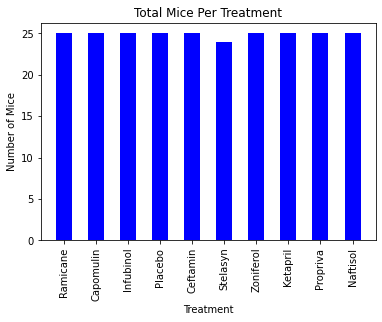

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Calculate number of mice for each regimen, using data frame for each regimen created earlier
ramicane_mice = ramicane["Mouse ID"].nunique()
capomulin_mice = capomulin["Mouse ID"].nunique()
infubinol_mice = infubinol["Mouse ID"].nunique()         
placebo_mice = placebo["Mouse ID"].nunique()
ceftamin_mice = ceftamin["Mouse ID"].nunique()
stelasyn_mice = stelasyn["Mouse ID"].nunique()
zoniferol_mice = zoniferol["Mouse ID"].nunique()
ketapril_mice = ketapril["Mouse ID"].nunique()
propriva_mice = propriva["Mouse ID"].nunique()
naftisol_mice = naftisol["Mouse ID"].nunique()

# Create list of reatmetns used
regimens = ["Ramicane", "Capomulin", "Infubinol", "Placebo", "Ceftamin", "Stelasyn", "Zoniferol", "Ketapril", 
          "Propriva", "Naftisol"]

# numberical x axis values correpsond to treatments
x_axis = np.arange(len(regimens))

# y axis shows # of mice that received the regimen
y_axis =  [ramicane_mice, capomulin_mice, infubinol_mice, placebo_mice, ceftamin_mice, stelasyn_mice, zoniferol_mice,
           ketapril_mice, propriva_mice, naftisol_mice]

# Plot # of mice per treatment and format/label the chart
plt.bar(x_axis, y_axis, color="blue", align="center", width=0.5)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, regimens, rotation="vertical")
plt.title("Total Mice Per Treatment")
plt.xlabel("Treatment")
plt.ylabel("Number of Mice")
plt.show()

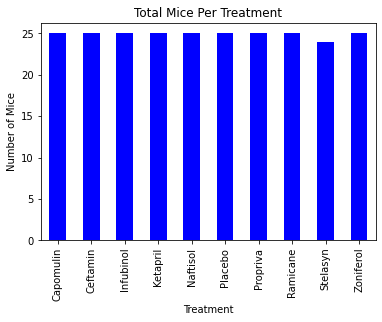

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas

# Create dataframe showing # of mice per treatment using drug regimen groupby object created earlier
mice_by_regimen = grouped_df["Mouse ID"].nunique()
mice_by_regimen

# Plot # of mice per treatment and format/label the chart
mice_by_regimen_chart = mice_by_regimen.plot(kind="bar", color="blue")
mice_by_regimen_chart.set_xlabel("Treatment")
mice_by_regimen_chart.set_ylabel("Number of Mice")
mice_by_regimen_chart.set_title("Total Mice Per Treatment")
plt.show()

Text(0, 0.5, '')

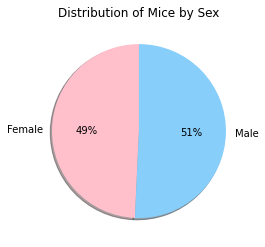

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Group data by sex and create a dataframe showing # of females and # of males
sex_grouped_df = merge_df.groupby("Sex")
sex_distribution = sex_grouped_df["Sex"].count()

# Create pie chart
sex_distribution_chart = sex_distribution.plot(kind="pie", autopct="%1.f%%", colors=["pink", "lightskyblue"], 
                                               title="Distribution of Mice by Sex", shadow="True", startangle=90)
sex_distribution_chart.set_ylabel("")
#plt.show()
#plt.tight_layout()

In [12]:
# Retrieve breakout of male and female mice
merge_df["Sex"].value_counts()

Male      958
Female    930
Name: Sex, dtype: int64

Text(0.5, 1.0, 'Distribution of Mice by Sex')

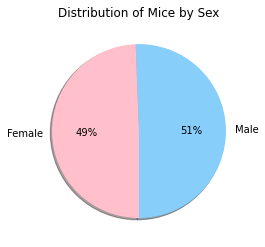

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Set values to use in pie chart
labels = ["Male", "Female"]
sizes = [958, 935]
colors = ["lightskyblue", "pink"]

# Create pie chart based on above values
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.f%%", shadow=True, startangle=270)
plt.title("Distribution of Mice by Sex")

## Quartiles, Outliers and Boxplots

In [14]:
merge_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,mouse_time
0,k403,Ramicane,Male,21,16,0,45.000000,0,k403_0
1,k403,Ramicane,Male,21,16,5,38.825898,0,k403_5
2,k403,Ramicane,Male,21,16,10,35.014271,1,k403_10
3,k403,Ramicane,Male,21,16,15,34.223992,1,k403_15
4,k403,Ramicane,Male,21,16,20,32.997729,1,k403_20


In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Create a dataframe that includes only the four specified drug regimens
four_treatment_df = merge_df.loc[(merge_df["Drug Regimen"] == "Capomulin") | 
                                 (merge_df["Drug Regimen"] == "Ramicane") |
                                 (merge_df["Drug Regimen"] == "Infubinol") |
                                 (merge_df["Drug Regimen"] == "Ceftamin"), :]                           

# Get the last (greatest) timepoint for each mouse
mouse_grouped_df = merge_df.groupby(["Mouse ID"])
max_timepoint_df = mouse_grouped_df["Timepoint"].max()
max_timepoint_df = max_timepoint_df.rename("Max Timepoint")

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
four_treatment_df = pd.merge(max_timepoint_df, four_treatment_df, left_on=["Mouse ID", "Max Timepoint"], 
                             right_on=["Mouse ID", "Timepoint"])

# Show dataframe
four_treatment_df.head(10)

,Mouse ID,Max Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,mouse_time
0,a203,45,Infubinol,Female,20,23,45,67.973419,2,a203_45
1,a251,45,Infubinol,Female,21,25,45,65.525743,1,a251_45
2,a275,45,Ceftamin,Female,20,28,45,62.999356,3,a275_45
3,a411,45,Ramicane,Male,3,22,45,38.407618,1,a411_45
4,a444,45,Ramicane,Female,10,25,45,43.047543,0,a444_45
5,a520,45,Ramicane,Male,13,21,45,38.810366,1,a520_45
6,a577,30,Infubinol,Female,6,25,30,57.031862,2,a577_30
7,a644,45,Ramicane,Female,7,17,45,32.978522,1,a644_45
8,a685,45,Infubinol,Male,8,30,45,66.083066,3,a685_45
9,b128,45,Capomulin,Female,9,22,45,38.982878,2,b128_45


In [16]:
# Retrieve Capomulin data to plot
capomulin_df = four_treatment_df.loc[four_treatment_df["Drug Regimen"] == "Capomulin"]
capomulin_tumor_volumes = capomulin_df["Tumor Volume (mm3)"]

# Calculate Capomulin IQR and upper/lower bounds
capomulin_quartiles = capomulin_tumor_volumes.quantile([0.25, .5, .75])
capomulin_lowerq = capomulin_quartiles[0.25]
capomulin_upperq = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_upperq-capomulin_lowerq
capomulin_lower_bound = capomulin_lowerq - (1.5*capomulin_iqr)
capomulin_upper_bound = capomulin_upperq + (1.5*capomulin_iqr)

# Retrieve Ramicane data to plot
ramicane_df = four_treatment_df.loc[four_treatment_df["Drug Regimen"] == "Ramicane"]
ramicane_tumor_volumes = ramicane_df["Tumor Volume (mm3)"]

# Calculate Ramicane IQR and upper/lower bounds
ramicane_quartiles = ramicane_tumor_volumes.quantile([0.25, .5, .75])
ramicane_lowerq = ramicane_quartiles[0.25]
ramicane_upperq = ramicane_quartiles[0.75]
ramicane_iqr = ramicane_upperq-ramicane_lowerq
ramicane_lower_bound = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_upper_bound = ramicane_upperq + (1.5*ramicane_iqr)

# Retrieve Infubinol data to plot
infubinol_df = four_treatment_df.loc[four_treatment_df["Drug Regimen"] == "Infubinol"]
infubinol_tumor_volumes = infubinol_df["Tumor Volume (mm3)"]

# Calculate Infubinol IQR and upper/lower bounds
infubinol_quartiles = infubinol_tumor_volumes.quantile([0.25, .5, .75])
infubinol_lowerq = infubinol_quartiles[0.25]
infubinol_upperq = infubinol_quartiles[0.75]
infubinol_iqr = infubinol_upperq-infubinol_lowerq
infubinol_lower_bound = infubinol_lowerq - (1.5*infubinol_iqr)
infubinol_upper_bound = infubinol_upperq + (1.5*infubinol_iqr)

# Retrieve Ceftamin data to plot
ceftamin_df = four_treatment_df.loc[four_treatment_df["Drug Regimen"] == "Ceftamin"]
ceftamin_tumor_volumes = ceftamin_df["Tumor Volume (mm3)"]

# Calculate Ceftamin IQR and upper/lower bounds
ceftamin_quartiles = ceftamin_tumor_volumes.quantile([0.25, .5, .75])
ceftamin_lowerq = ceftamin_quartiles[0.25]
ceftamin_upperq = ceftamin_quartiles[0.75]
ceftamin_iqr = ceftamin_upperq-ceftamin_lowerq
ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5*ceftamin_iqr)


In [25]:
# Check for outliers in each data set using above calculations

# Check Capomulin outliers
capomulin_outliers = []
for tumor in capomulin_tumor_volumes:
    if tumor < capomulin_lower_bound:
        capomulin_outliers.append(tumor)
    if tumor > capomulin_upper_bound:
        capomulin_outliers.append(tumor)

if capomulin_outliers == []:
    print(f"There are no outliers in the Capomulin data set")
else:
    print(f"Outliers in the Capomulin data set include {capomulin_outliers}")

# Check Ramicane outliers
ramicane_outliers = []
for tumor in ramicane_tumor_volumes:
    if tumor < ramicane_lower_bound:
        ramicane_outliers.append(tumor)
    if tumor > ramicane_upper_bound:
        ramicane_outliers.append(tumor)

if ramicane_outliers == []:
    print(f"There are no outliers in the Ramicane data set")
else:
    print(f"Outliers in the Ramicane data set include {ramicane_outliers}")

# Check Infubniol outliers
infubinol_outliers = []
for tumor in infubinol_tumor_volumes:
    if tumor < infubinol_lower_bound:
        infubinol_outliers.append(tumor)
    if tumor > infubinol_upper_bound:
        infubinol_outliers.append(tumor)

if infubinol_outliers == []:
    print(f"There are no outliers in the Infubinol data set")
else:
    print(f"Outliers in the Infubinol data set include {infubinol_outliers}")
    
# Check Ceftamin outliers
ceftamin_outliers = []
for tumor in ceftamin_tumor_volumes:
    if tumor < ceftamin_lower_bound:
        ceftamin_outliers.append(tumor)
    if tumor > ceftamin_upper_bound:
        ceftamin_outliers.append(tumor)

if ceftamin_outliers == []:
    print(f"There are no outliers in the Ceftamin data set")
else:
    print(f"Outliers in the Ceftamin data set include {ceftamin_outliers}")


There are no outliers in the Capomulin data set
There are no outliers in the Ramicane data set
Outliers in the Infubinol data set include [36.321345799999996]
There are no outliers in the Ceftamin data set


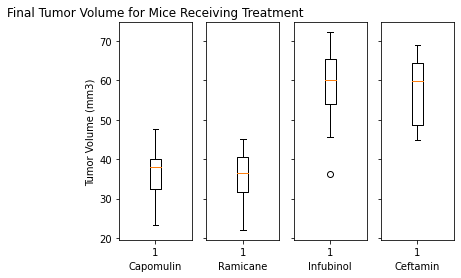

<Figure size 432x288 with 0 Axes>

In [26]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Plot data
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey="row")                                  
ax1.set_title("Final Tumor Volume for Mice Receiving Treatment")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(capomulin_tumor_volumes)
ax2.boxplot(ramicane_tumor_volumes)
ax3.boxplot(infubinol_tumor_volumes)
ax4.boxplot(ceftamin_tumor_volumes)

# Label each treatment regimen
ax1.set_xlabel("Capomulin")
ax2.set_xlabel("Ramicane")
ax3.set_xlabel("Infubinol")
ax4.set_xlabel("Ceftamin")   

# Display
plt.show()
plt.tight_layout()


## Line and Scatter Plots

In [27]:
# Create dataframe with just the time and tumor volume data for Mouse 128 (treated with Capomulin)
mouse_128_df = merge_df.loc[merge_df["Mouse ID"] == "b128"]
mouse_128_df = mouse_128_df[["Timepoint", "Tumor Volume (mm3)"]]
mouse_128_df = mouse_128_df.set_index("Timepoint")

# Display dataframe
mouse_128_df

,Tumor Volume (mm3)
Timepoint,
0,45.000000
5,45.651331
10,43.270852
15,43.784893
20,42.731552
25,43.262145
30,40.605335
35,37.967644
40,38.379726


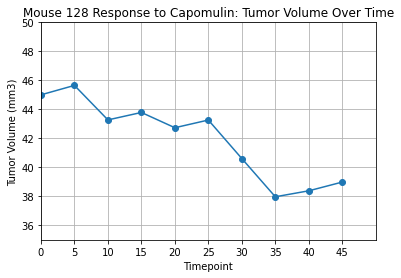

In [28]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Set tick locations
tick_locations = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

# Plot line
line_plot = mouse_128_df.plot(kind="line", grid=True, xticks=tick_locations, marker="o", legend=False,
                              xlim=[0, 50], ylim=[35, 50],
                              title="Mouse 128 Response to Capomulin: Tumor Volume Over Time")
# Label axes
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

# Display line plot
plt.show()

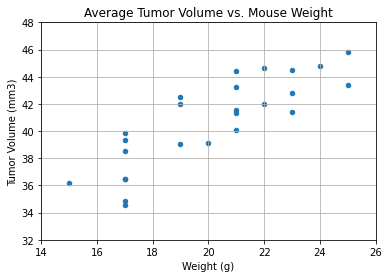

In [29]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Create dataframe with just the Capomulin data
capomulin_df = merge_df.loc[merge_df["Drug Regimen"] == "Capomulin"]

# Group the Capomulin dataframe by Mouse ID; create series for mouse weight and mouse tumor volume
capomulin_grouped_df = capomulin_df.groupby("Mouse ID")
mouse_weight_df = capomulin_grouped_df["Weight (g)"].mean()
mouse_tumor_volume_df = capomulin_grouped_df["Tumor Volume (mm3)"].mean()

# Combine the mouse weight and mouse tumor volume data series
weight_tumor_df = pd.merge(mouse_weight_df, mouse_tumor_volume_df, on="Mouse ID")

# Plot tumor volume vs. weight
weight_tumor_df.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, xlim=[14,26], ylim=[32,48],
                    title="Average Tumor Volume vs. Mouse Weight")
plt.show()


## Correlation and Regression

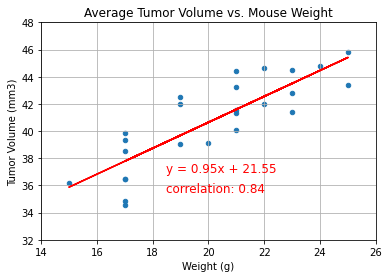

In [30]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Calculate correlation coefficient
correlation = st.pearsonr(weight_tumor_df["Weight (g)"], weight_tumor_df["Tumor Volume (mm3)"])
correlation_coefficient = round(correlation[0], 2)

# Calculate linear regression model
x_values = weight_tumor_df["Weight (g)"]
y_values = weight_tumor_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Add line to plot created earlier
weight_tumor_df.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, xlim=[14,26], ylim=[32,48],
                    title="Average Tumor Volume vs. Mouse Weight")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18.5,37),fontsize=12,color="red")
plt.annotate(f"correlation: {correlation_coefficient}",(18.5,35.5),fontsize=12, color="red")
plt.show()